<a href="https://colab.research.google.com/github/RabiaBabar/Deep-Learning---Computer-Vision/blob/main/Alexnet_Architecture_on_Intel_Image_Classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

***METHOD 1: Kaggle recommended Method to get data set ***

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rabiababar","key":"87d72b1b60c565918a0fcef6e22f77a3"}'}

In [5]:
# we need to move kaggle file to working directory of server so we make a directory names kaglle
!mkdir ~/.kaggle

In [6]:
# check contents in drive
!ls

drive  kaggle.json  sample_data


In [7]:
# check current working directory
!pwd

/content


In [8]:
#copy kaggle.json to destination directory i.e. kaggle directory
!cp kaggle.json ~/.kaggle

In [9]:
!ls

drive  kaggle.json  sample_data


In [10]:
# giving read and write access to user vi 600 linux commnad
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
# getting kaggle dataset list
! kaggle datasets list

ref                                                  title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                      DAIGT V2 Train Dataset                      29MB  2023-11-16 01:38:36           3019        251  1.0              
muhammadbinimran/housing-price-prediction-data       Housing Price Prediction Data              763KB  2023-11-21 17:56:32          12765        218  1.0              
rishabhkarn/ipl-auction-2023                         IPL Auction 2023                             4KB  2023-12-24 10:45:03            673         26  0.9411765        
bhavikjikadara/car-price-prediction-dataset          Car Price Prediction Dataset                 4KB  2023-12-23 07:07:54           1238         33  0.9411765 

In [12]:
! kaggle datasets download -d puneet6060/intel-image-classification # getcopy command from kaggle data set page

 97% 337M/346M [00:01<00:00, 258MB/s]
100% 346M/346M [00:01<00:00, 213MB/s]


***METHOD 2: to Download Dataset from Kaggle***

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"rabiababar","key":"87d72b1b60c565918a0fcef6e22f77a3"}'}

In [3]:
!pip install opendatasets --upgrade

In [4]:
import opendatasets as od

In [5]:
dataset_path = 'https://www.kaggle.com/datasets/puneet6060/intel-image-classification'

In [6]:
od.download(dataset_path)

Skipping, found downloaded files in "./intel-image-classification" (use force=True to force download)


In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
# Defining paths
base_path ='/content/intel-image-classification'
training_images_path = base_path + '/seg_train/seg_train/'
test_images_path = base_path + '/seg_test/seg_test/'
pred_images_path = base_path + '/seg_pred/seg_pred/'

In [9]:
# Assigning numbers to classes i.e. encoding
for folders in sorted(os.listdir(training_images_path)):
                          print(folders)


buildings
forest
glacier
mountain
sea
street


In [10]:
class_names=[]
for folders in sorted(os.listdir(training_images_path)):
                          class_names.append(folders)

class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [11]:
class_labels = {}
i=0
for i, classes in enumerate(class_names):
   class_labels[classes] = i
class_labels



{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [12]:
os.listdir(training_images_path)

['glacier', 'forest', 'mountain', 'buildings', 'street', 'sea']

In [13]:
# define image size for all images
image_size= (150,150)

In [14]:
train_data =[]
train_lables = []

In [15]:
# Training Dataset

for folder in os.listdir(training_images_path):
  print(f'in folder: {folder}')
  for file in os.listdir(training_images_path + '/' + folder):
    image_path = os.path.join(training_images_path, folder, file)
    image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, image_size)
    train_data.append(image)
    train_lables.append(class_labels[folder])

# conversion to numpy array
train_data =np.array(train_data, dtype = 'float32')
#normalization of data by dividing with 255
train_data= train_data/255.0

train_labels = np.array(train_lables, dtype='int32')

in folder: glacier
in folder: forest
in folder: mountain
in folder: buildings
in folder: street
in folder: sea


In [16]:
test_data =[]
test_lables = []

In [17]:
# Test Dataset

for folder in os.listdir(test_images_path):
  print(f'in folder: {os.path.join(test_images_path, folder)}')
  for file in os.listdir(test_images_path + '/' + folder):
    image_path = os.path.join(test_images_path, folder, file)
    image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, image_size)
    test_data.append(image)
    test_lables.append(class_labels[folder])

# conversion to numpy array
test_data =np.array(test_data, dtype = 'float32')
#normalization of data by dividing with 255
test_data= test_data/255.0

test_labels = np.array(test_lables, dtype='int32')

in folder: /content/intel-image-classification/seg_test/seg_test/glacier
in folder: /content/intel-image-classification/seg_test/seg_test/forest
in folder: /content/intel-image-classification/seg_test/seg_test/mountain
in folder: /content/intel-image-classification/seg_test/seg_test/buildings
in folder: /content/intel-image-classification/seg_test/seg_test/street
in folder: /content/intel-image-classification/seg_test/seg_test/sea


In [18]:

# three channles for each color
print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

(14034, 150, 150, 3)
(14034,)
(3000, 150, 150, 3)
(3000,)


{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [19]:
import random
# pick up five random image from each class and display image and its labels
r_b = random.sample(list(np.where(train_labels == 0)[0]), 5)
r_f = random.sample(list(np.where(train_labels == 1)[0]), 5)
r_g = random.sample(list(np.where(train_labels == 2)[0]), 5)
r_m = random.sample(list(np.where(train_labels == 3)[0]), 5)
r_se = random.sample(list(np.where(train_labels == 4)[0]), 5)
r_st = random.sample(list(np.where(train_labels == 5)[0]), 5)

plots = np.array([r_b + r_f + r_g + r_m + r_se + r_st][0])
plots = plots.reshape(6,5)
print(plots)

[[ 7893  8110  9291  7631  8404]
 [ 2914  2818  2871  4671  3432]
 [  557   633  2053  2302  1087]
 [ 6102  6713  6834  5390  6928]
 [13262 13323 11938 12794 11796]
 [ 9703 10350  9616 10163  9927]]


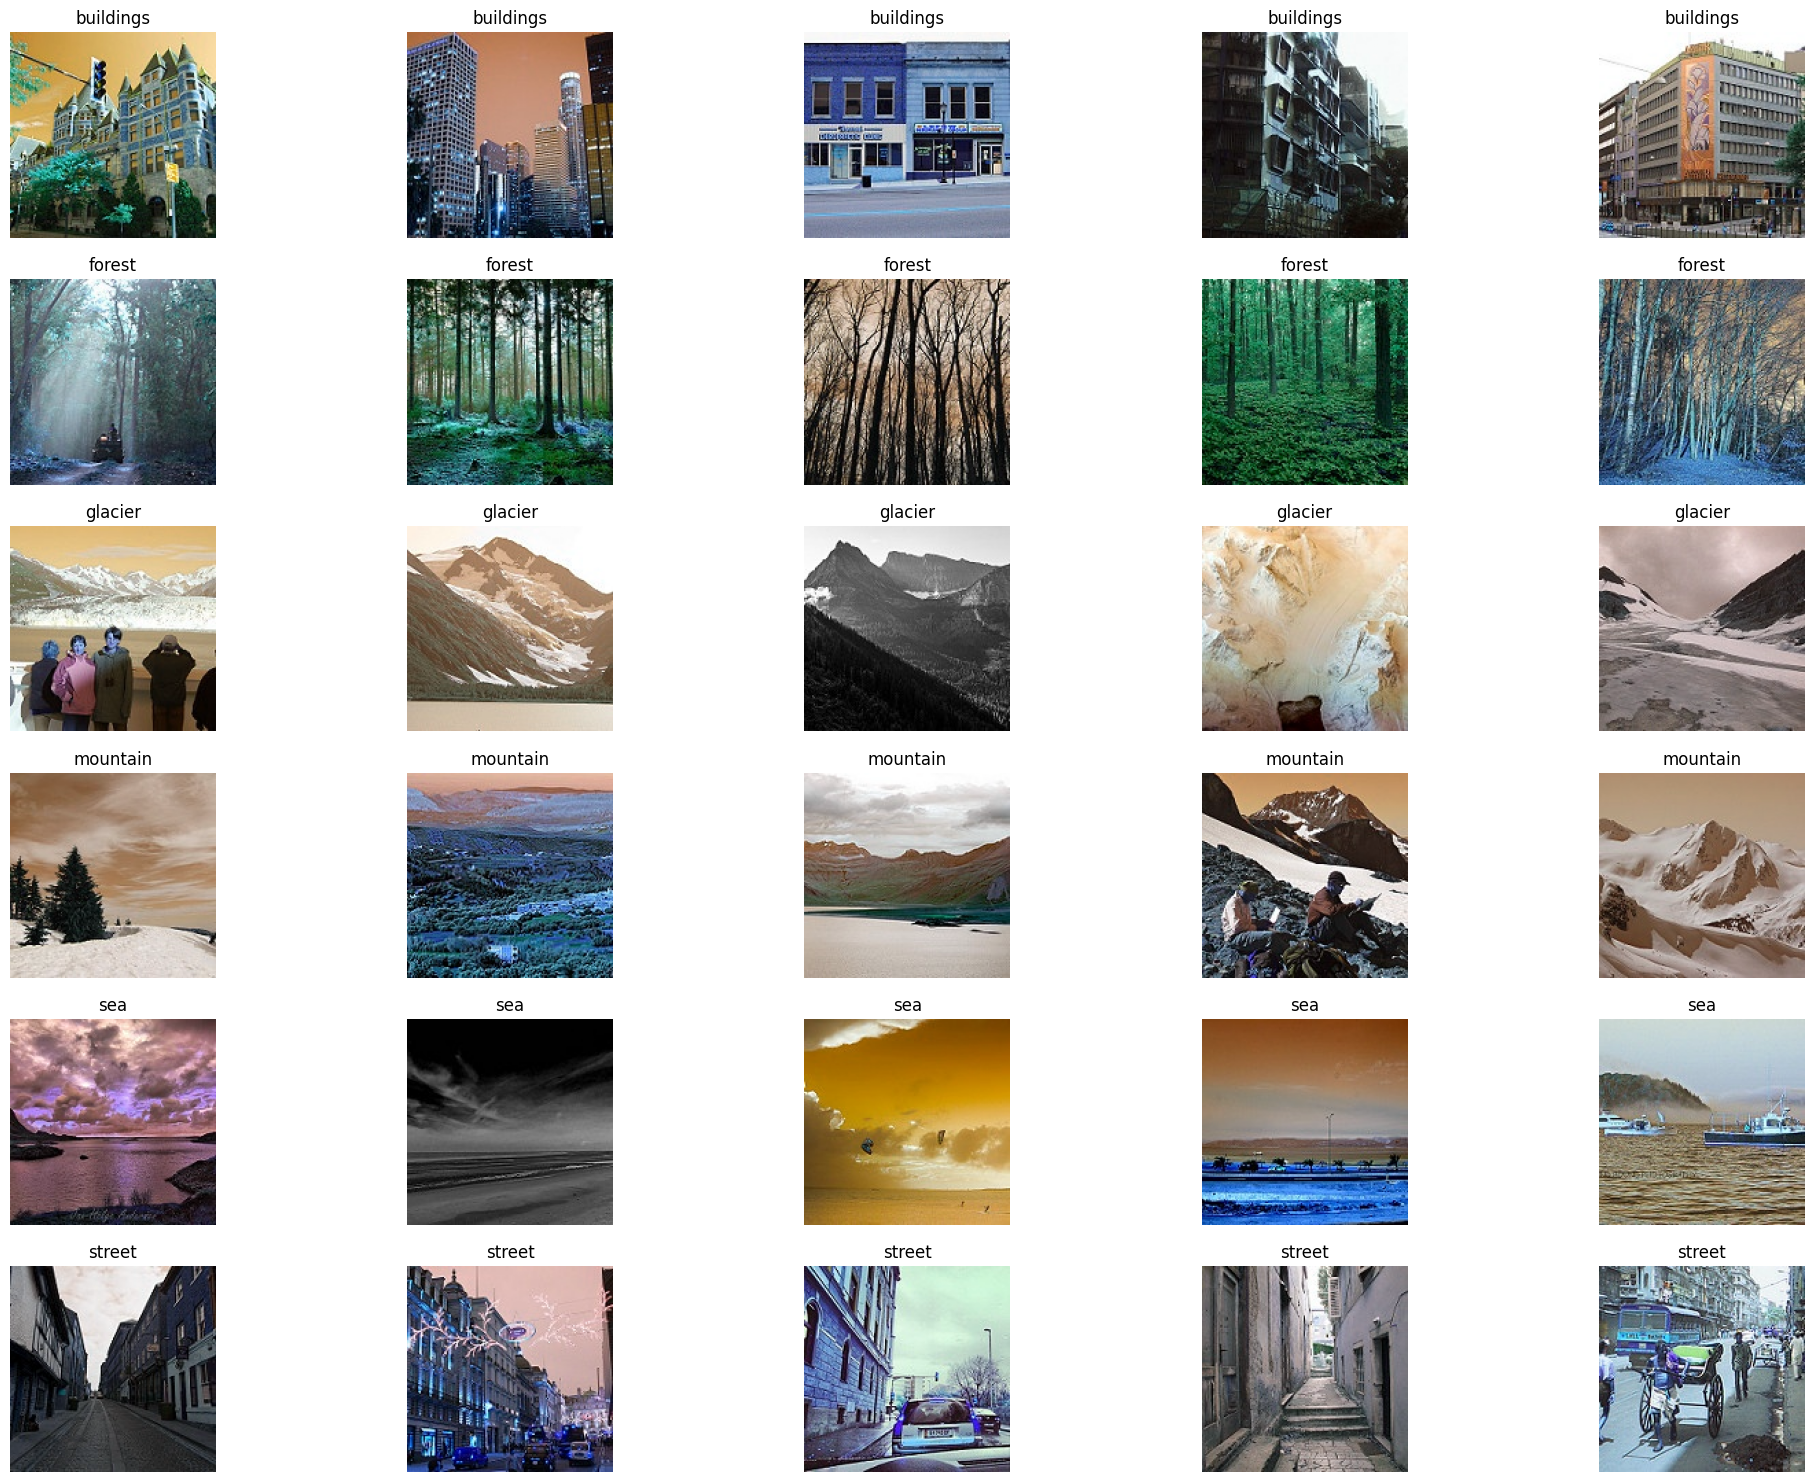

In [21]:
f,ax =plt.subplots(6,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,6,1):
  for j in range(0,5,1):
    ax[i,j].imshow(train_data[plots[i,j]],cmap = plt.cm.gray)
    ax[i,j].set_title(class_names[train_labels[plots[i,j]]])
    ax[i,j].axis('off')

Implementing AlexNet Architecture

In [19]:
#Shuffling Data
from sklearn.utils import shuffle

In [20]:
train_data, train_labels = shuffle(train_data, train_labels, random_state = 80)

In [21]:
# Coding of Model - AlexNet- Architecture

import tensorflow as tf
from tensorflow import keras

from keras import Sequential, layers
from keras.layers import Resizing, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout


In [22]:
# input layer resizing
alexnet_model = keras.Sequential([
          Resizing(227,227, interpolation = 'bilinear', input_shape= (150,150,3)),

          Conv2D (filters = 96, kernel_size=(11,11), strides=(4,4), activation= 'relu', input_shape=(227, 227,3)),
          BatchNormalization(),

          MaxPooling2D(pool_size= (3,3) , strides=(2,2)),

          Conv2D (filters = 256, kernel_size=(5,5), strides=(1,1), padding ='same', activation= 'relu'),
          BatchNormalization(),

          MaxPooling2D(pool_size= (3,3) ,strides=(2,2)),

          Conv2D (filters = 384, kernel_size=(3,3), strides=(1,1), padding ='same', activation= 'relu'),
          BatchNormalization(),

          Conv2D (filters = 384, kernel_size=(3,3), strides=(1,1), padding ='same', activation= 'relu'),
          BatchNormalization(),

          Conv2D (filters = 256, kernel_size=(3,3), strides=(1,1), padding ='same', activation= 'relu'),
          BatchNormalization(),

          MaxPooling2D(pool_size= (3,3) ,strides=(2,2)),
        #Flattining layer
          Flatten(),


         #First dense layers with 4096 neurons
          Dense(4096, activation = 'relu'),
          Dropout(0.5),

         #Second dense layers with 4096 neurons
          Dense(4096, activation = 'relu'),
          Dropout(0.5),

        #Softmax Layer
        Dense(len(class_names), activation='softmax')


])

In [23]:
# Compiling the Alexnet Model
alexnet_model.compile(loss='sparse_categorical_crossentropy' , optimizer =tf.optimizers.SGD(learning_rate=0.01), metrics=('accuracy'))


In [24]:
alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 227, 227, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 256)       1

In [25]:
#Fit model on train data
history = alexnet_model.fit(train_data, train_labels, epochs =20, validation_split=0.2)

Epoch 1/20
351/351 [==============================] - 31s 61ms/step - loss: 1.5786 - accuracy: 0.5372 - val_loss: 1.4789 - val_accuracy: 0.4585
Epoch 2/20
351/351 [==============================] - 18s 50ms/step - loss: 0.9250 - accuracy: 0.6616 - val_loss: 1.0476 - val_accuracy: 0.6053
Epoch 3/20
351/351 [==============================] - 19s 54ms/step - loss: 0.7646 - accuracy: 0.7220 - val_loss: 1.0570 - val_accuracy: 0.6238
Epoch 4/20
351/351 [==============================] - 19s 54ms/step - loss: 0.6661 - accuracy: 0.7594 - val_loss: 1.1814 - val_accuracy: 0.5907
Epoch 5/20
351/351 [==============================] - 19s 56ms/step - loss: 0.6067 - accuracy: 0.7828 - val_loss: 0.7115 - val_accuracy: 0.7353
Epoch 6/20
351/351 [==============================] - 19s 55ms/step - loss: 0.5532 - accuracy: 0.8002 - val_loss: 0.6814 - val_accuracy: 0.7471
Epoch 7/20
351/351 [==============================] - 18s 52ms/step - loss: 0.4955 - accuracy: 0.8152 - val_loss: 0.8951 - val_accuracy:

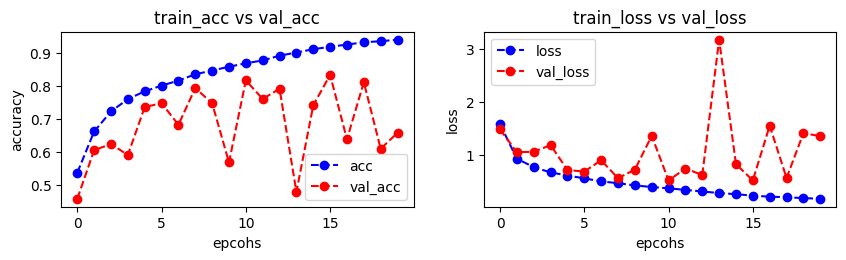

In [26]:
fig = plt.figure(figsize=(10,5))

#plot accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'], 'bo--',label = "acc")
plt.plot(history.history['val_accuracy'], 'ro--',label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epcohs")
plt.legend()

#plot loss funtion
plt.subplot(222)
plt.plot(history.history['loss'], 'bo--',label = "loss")
plt.plot(history.history['val_loss'], 'ro--',label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epcohs")
plt.legend()

plt.show()


In [27]:
alexnet_model.save('alexnet_model_weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
from keras.models import load_model
new_model = load_model('/content/alexnet_model_weights.h5')
# Ww loaded weights of the model so that we don't need to train model again

In [20]:
# Running predictions
loss, acc =new_model.evaluate(test_data, test_labels, verbose = 2)


94/94 - 5s - loss: 1.3743 - accuracy: 0.6540 - 5s/epoch - 56ms/step


In [21]:
y_predicitions = np.argmax(new_model.predict(test_data), axis =-1)

94/94 [==============================] - 2s 15ms/step


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [23]:
conf_matrix = confusion_matrix(test_labels, y_predicitions)

In [24]:
conf_matrix

array([[393,   9,   1,   0,   1,  33],
       [  7, 462,   0,   0,   0,   5],
       [204,  13, 230,  31,  40,  35],
       [203,  76,  24, 192,  18,  12],
       [187,  10,   8,   3, 290,  12],
       [ 84,  20,   0,   1,   1, 395]])

In [30]:
print(f'Accuracy: {accuracy_score(test_labels, y_predicitions)}')
print(f'Precision Score: {precision_score(test_labels, y_predicitions, average = "macro")}')

Accuracy: 0.654
Precision Score: 0.7498952507846594


In [31]:
test_data.shape

(3000, 150, 150, 3)

In [26]:
import seaborn as sns

<Axes: >

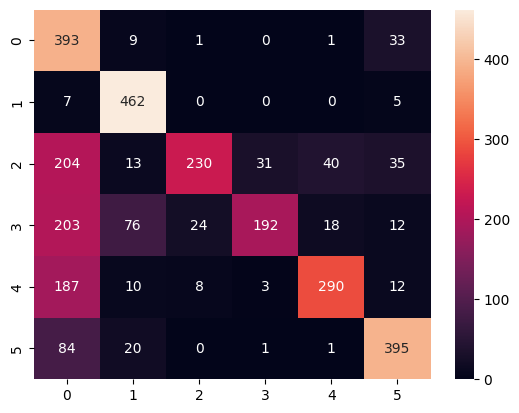

In [27]:
sns.heatmap(conf_matrix, annot = True, fmt='g' )

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


For class '0' that is buidlings, 393 buildings were predicted correctly, remaining 7, 2014, 203, 187 and 84 are misclassified as buildings.